Dataset taken from :

https://drive.google.com/file/d/1y5DYn0dGoSbC22xowBq2d4po6h1JxcTQ/view?usp=sharing

- Data consists of transactions made in a retail/grocery store
- No of transactions: ~ 7500
- Max number of items per transaction: 20

### Importing all relevant libraries

In [1]:
!pip install apyori

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split, KFold

from apyori import apriori   ## Importing apriori to perform Association Rule

In [3]:
# Loading the transactions data

df=pd.read_csv('store_data.csv',header=None)

In [4]:
df  # Take a look at the transactions data

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil
1,burgers,meatballs,eggs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,chutney,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,turkey,avocado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,mineral water,milk,energy bar,whole wheat rice,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,low fat yogurt,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,whole wheat pasta,french fries,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,soup,light cream,shallot,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,frozen vegetables,spaghetti,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,french fries,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
## FUNCTION TO CONVERT DATAFRAME TO LIST

def convert_to_list(dataframe):
    
    data_list=[]
    
    for i in range(len(dataframe.iloc[:,0])):
        data_list.append([str(dataframe.values[i,j]) for j in range(len(dataframe.iloc[0,:]))])
    
    return data_list  

In [6]:
df_list=convert_to_list(df)  # Converting to list

In [7]:
print ("No of Transaction:", len(df_list))

No of Transaction: 7501


In [8]:
print (df_list)  # List contains NAN Values

[['shrimp', 'almonds', 'avocado', 'vegetables mix', 'green grapes', 'whole weat flour', 'yams', 'cottage cheese', 'energy drink', 'tomato juice', 'low fat yogurt', 'green tea', 'honey', 'salad', 'mineral water', 'salmon', 'antioxydant juice', 'frozen smoothie', 'spinach', 'olive oil'], ['burgers', 'meatballs', 'eggs', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan'], ['chutney', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan'], ['turkey', 'avocado', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan'], ['mineral water', 'milk', 'energy bar', 'whole wheat rice', 'green tea', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan'], ['low fat yogurt', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan

In [9]:
## FUNCTION TO CLEAN THE LIST FROM NAN VALUES

def clean_list(list_to_clean):
    
    cleaned_list=[]
    
    for i in range(len(list_to_clean)):
        cleaned_list.append([x for x in list_to_clean[i] if str(x) != 'nan'])
    
    return cleaned_list

In [10]:
clean_df_list=clean_list(df_list)  # Cleaning the list

In [11]:
print (clean_df_list)  # List cleaned

[['shrimp', 'almonds', 'avocado', 'vegetables mix', 'green grapes', 'whole weat flour', 'yams', 'cottage cheese', 'energy drink', 'tomato juice', 'low fat yogurt', 'green tea', 'honey', 'salad', 'mineral water', 'salmon', 'antioxydant juice', 'frozen smoothie', 'spinach', 'olive oil'], ['burgers', 'meatballs', 'eggs'], ['chutney'], ['turkey', 'avocado'], ['mineral water', 'milk', 'energy bar', 'whole wheat rice', 'green tea'], ['low fat yogurt'], ['whole wheat pasta', 'french fries'], ['soup', 'light cream', 'shallot'], ['frozen vegetables', 'spaghetti', 'green tea'], ['french fries'], ['eggs', 'pet food'], ['cookies'], ['turkey', 'burgers', 'mineral water', 'eggs', 'cooking oil'], ['spaghetti', 'champagne', 'cookies'], ['mineral water', 'salmon'], ['mineral water'], ['shrimp', 'chocolate', 'chicken', 'honey', 'oil', 'cooking oil', 'low fat yogurt'], ['turkey', 'eggs'], ['turkey', 'fresh tuna', 'tomatoes', 'spaghetti', 'mineral water', 'black tea', 'salmon', 'eggs', 'chicken', 'extra d

#### Let's Explore the data a bit. We will find out which items are most prevalent in our dataset

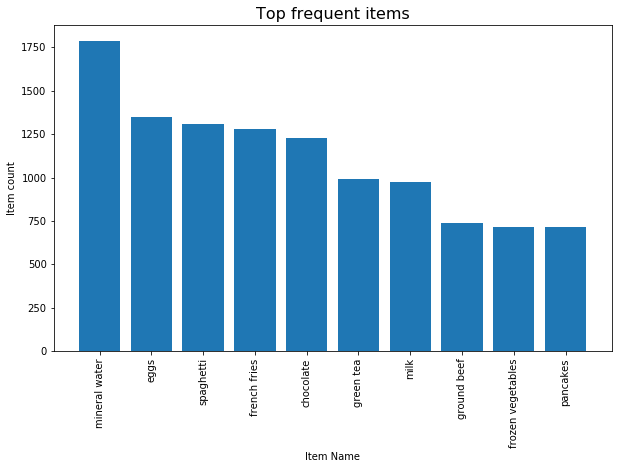

In [43]:
corpus=pd.DataFrame(np.concatenate([df[i].unique() for i in df.columns]))
corpus=corpus.dropna()
corpus=corpus.drop_duplicates()

count_corpus=[]
for k in corpus[0].index:
    count=0
    index=[]
    for j in range(len(df.columns)):
        for i in range(len(df)):
            if df[j][i]==corpus[0][k]:
                count+=1            
    count_corpus.append(count)
    
corpus['count']=count_corpus
corpus=corpus.sort_values(by=['count'],ascending=False)

plt.figure(figsize=(10,6))
plt.bar(corpus[0][0:10],height=corpus['count'][0:10])
plt.xticks(rotation='vertical')
plt.title('Top frequent items', fontsize=16)
plt.xlabel('Item Name')
plt.ylabel('Item count')
plt.show()

**We can see the top 10 items which are most bought. So we can expect that these items will form a part of our model and rules**

### Splitting the cleaned data into training and testing dataset

In [12]:
train, test = train_test_split(clean_df_list, test_size = 0.3, random_state=1)

### Performing Association Rule in training data

In [13]:
association_rules = apriori(train, min_support=0.0045, min_confidence=0.2, min_lift=3, min_length=2)
association_results = list(association_rules)

In [14]:
print(association_results[0])

RelationRecord(items=frozenset({'chicken', 'light cream'}), support=0.004952380952380952, ordered_statistics=[OrderedStatistic(items_base=frozenset({'light cream'}), items_add=frozenset({'chicken'}), confidence=0.2988505747126437, lift=4.9338538278030795)])


In [15]:
## Printing the Results in a readable format

for item in association_results:
  
    # first index of the inner list
    # Contains base item and add item
    pair = item[0] 
    items = [x for x in pair]
    print("Rule: " + str(list(item.ordered_statistics[0].items_base)) + " -> " + str(list(item.ordered_statistics[0].items_add)))

    #second index of the inner list
    print("Support: " + str(item[1]))

    #third index of the list located at 0th
    #of the third index of the inner list

    print("Confidence: " + str(item[2][0][2]))
    print("Lift: " + str(item[2][0][3]))
    print("=====================================")

Rule: ['light cream'] -> ['chicken']
Support: 0.004952380952380952
Confidence: 0.2988505747126437
Lift: 4.9338538278030795
Rule: ['mushroom cream sauce'] -> ['escalope']
Support: 0.005523809523809524
Confidence: 0.3118279569892473
Lift: 3.879376242164806
Rule: ['pasta'] -> ['escalope']
Support: 0.005142857142857143
Confidence: 0.33749999999999997
Lift: 4.198755924170616
Rule: ['fresh tuna'] -> ['pancakes']
Support: 0.006285714285714286
Confidence: 0.28695652173913044
Lift: 3.0496391480373175
Rule: ['herb & pepper'] -> ['ground beef']
Support: 0.016
Confidence: 0.3193916349809886
Lift: 3.1939163498098857
Rule: ['tomato sauce'] -> ['ground beef']
Support: 0.006095238095238095
Confidence: 0.4
Lift: 4.0
Rule: ['whole wheat pasta'] -> ['olive oil']
Support: 0.007619047619047619
Confidence: 0.26666666666666666
Lift: 4.105571847507331
Rule: ['pasta'] -> ['shrimp']
Support: 0.005333333333333333
Confidence: 0.35
Lift: 4.926273458445039
Rule: ['chocolate', 'frozen vegetables'] -> ['shrimp']
Supp

In [16]:
# Spliting the rules into LHS and RHS and converting the same into tuple for calculating accuracy

lhs_rules=[]
rhs_rules=[]

for item in association_results:

    pair = item[0] 
    items = [x for x in pair]
    
    lhs_rules.append(item.ordered_statistics[0].items_base)  # Splitting LHS
    rhs_rules.append(item.ordered_statistics[0].items_add)   # Splitting RHS

# Converting to Tuple    
lhs_t, rhs_t =tuple(lhs_rules), tuple(rhs_rules)
lhs_t, rhs_t

((frozenset({'light cream'}),
  frozenset({'mushroom cream sauce'}),
  frozenset({'pasta'}),
  frozenset({'fresh tuna'}),
  frozenset({'herb & pepper'}),
  frozenset({'tomato sauce'}),
  frozenset({'whole wheat pasta'}),
  frozenset({'pasta'}),
  frozenset({'chocolate', 'frozen vegetables'}),
  frozenset({'chocolate', 'herb & pepper'}),
  frozenset({'chocolate', 'soup'}),
  frozenset({'eggs', 'red wine'}),
  frozenset({'frozen smoothie', 'spaghetti'}),
  frozenset({'ground beef', 'milk'}),
  frozenset({'frozen vegetables', 'spaghetti'}),
  frozenset({'frozen vegetables', 'olive oil'}),
  frozenset({'frozen vegetables', 'soup'}),
  frozenset({'milk', 'tomatoes'}),
  frozenset({'mineral water', 'shrimp'}),
  frozenset({'frozen vegetables', 'spaghetti'}),
  frozenset({'frozen vegetables', 'spaghetti'}),
  frozenset({'frozen vegetables', 'spaghetti'}),
  frozenset({'grated cheese', 'mineral water'}),
  frozenset({'herb & pepper', 'mineral water'}),
  frozenset({'herb & pepper', 'spaghetti'

In [17]:
# FUNCTION TO FIND ACCURACY

# Accuracy Concept: 
      # If lhs and rhs part is a subset of the transaction, increase positive count. 
      # If only lhs part is a subset of the transaction, increase negative count
      # Accuracy = Total Pos/(Total Pos + Total Neg)

def find_accuracy(l_rule, r_rule, data):
    
    if len(l_rule)==0:
        return 0
    
    else:
        pos, neg = 0, 0

        for trans in data:
            for l, _ in enumerate(l_rule):
                if (l_rule[l].issubset(trans)):
                    if (r_rule[l].issubset(trans)):
                        pos += 1
                    else:
                        neg += 1

        return pos/(pos+neg)

In [18]:
# Calculating accuracy of our model

print ("Accuracy is:", find_accuracy(lhs_t,rhs_t, test))

Accuracy is: 0.23124147339699863


### Hyper-parameters: threshold values of support, confidence and lift

#### 1. Tuning Support

**Concept: As support value decides the number of itemsets to model upon, we will calculate the count of twos and threes in a range of values of support**

In [45]:
min_sup = np.arange(0.003,0.01,0.0005)

twos = []
threes = []
fours = []

for minsup in min_sup:
    
    rul_min_sup= apriori(train, min_support=minsup, min_confidence=0.2, min_length=2)

    rul_min_sup_res=list(rul_min_sup)

    lhs_rules=[]
    rhs_rules=[]
    
    for item in rul_min_sup_res:

        pair = item[0] 
        items = [x for x in pair]

        lhs_rules.append(item.ordered_statistics[0].items_base)

        rhs_rules.append(item.ordered_statistics[0].items_add)
    
    l_t, r_t =tuple(lhs_rules), tuple(rhs_rules)

    twos_c=0
    threes_c=0
    fours_c=0
    
    for t in range(len(l_t)):
        
        if (len(l_t[t])+len(r_t[t]))==2:
            twos_c+=1
            
        if (len(l_t[t])+len(r_t[t]))==3:
            threes_c+=1
            
        if (len(l_t[t])+len(r_t[t]))==4:
            fours_c+=1  
    
    twos.append(twos_c)        
    threes.append(threes_c)        
    fours.append(fours_c)        

In [46]:
## Count of twos, threes and fours in increasing value of support

print ("Count of twos:", twos)
print ("Count of threes:",threes)
print ("Count of fours:",fours)

Count of twos: [292, 258, 248, 231, 213, 203, 186, 167, 157, 144, 137, 128, 121, 117]
Count of threes: [566, 391, 313, 226, 169, 151, 112, 84, 69, 51, 44, 29, 24, 20]
Count of fours: [41, 25, 16, 6, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]


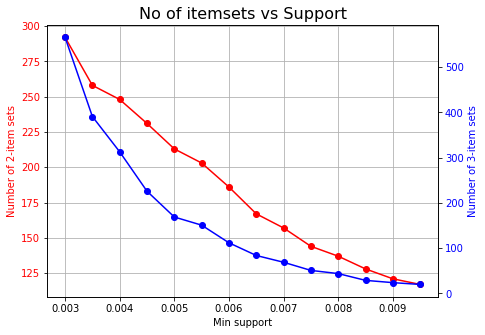

In [48]:
#Plotting count of twos and threes in a range of support values

import matplotlib.pyplot as plt
%matplotlib inline


fig, ax1 = plt.subplots(figsize=(7,5))
ax1.plot(min_sup, twos, 'ro-')
ax1.set_xlabel('Min support')
ax1.set_ylabel('Number of 2-item sets', color='r')
ax1.tick_params(axis='y', labelcolor='r')

ax2 = ax1.twinx()
ax2.plot(min_sup, threes, 'bo-')
ax2.set_ylabel('Number of 3-item sets', color='b')
ax2.tick_params(axis='y', labelcolor='b')

plt.title('No of itemsets vs Support', fontsize=16)
ax1.grid()
plt.show()

#### The number of itemsets are observed to decrease with increasing support value. Therefore, to have maximum transactions to check for confidence, we will choose the least value of support 

In [22]:
set_min_sup = 0.004

#### 2. Tuning Confidence

**Concept: For the tuned value of support and range of values of confidence, we will calculate the accuracy as well as the number of rules of the model**

In [50]:
min_conf = np.arange(0.1, 1.0, 0.01)

conf_accuracy = []
conf_numbers = []

for mincon in min_conf:

    rul_min_conf = apriori(train, min_support=set_min_sup, min_confidence = mincon, min_length=2)
    
    rul_min_conf_res=list(rul_min_conf)

    lhs_rules=[]
    rhs_rules=[]
    
    for item in rul_min_conf_res:

        pair = item[0] 
        items = [x for x in pair]

        lhs_rules.append(item.ordered_statistics[0].items_base)

        rhs_rules.append(item.ordered_statistics[0].items_add)
    
    l_t, r_t =tuple(lhs_rules), tuple(rhs_rules)
        
    conf_numbers.append(len(rul_min_conf_res))
    conf_accuracy.append(find_accuracy(l_t,r_t, test))

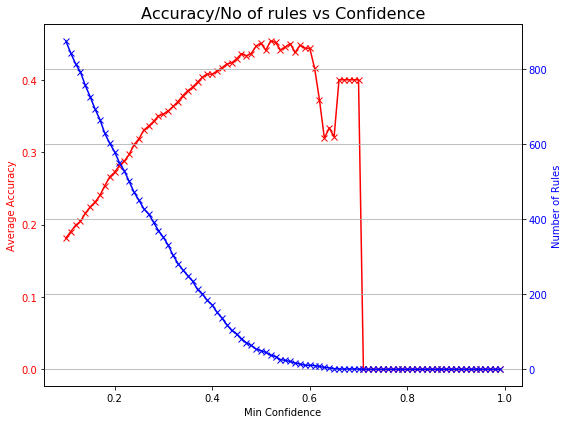

In [63]:
# Plotting accuracy and number of rules for the range of values of confidence

fig, ax1 = plt.subplots(figsize=(8,6))

color = 'tab:red'
ax1.set_xlabel('Min Confidence')
ax1.set_ylabel('Average Accuracy', color='r')
ax1.plot(min_conf, conf_accuracy, 'rx-')
ax1.tick_params(axis='y', labelcolor='r')

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Number of Rules', color='b')  # we already handled the x-label with ax1
ax2.plot(min_conf, conf_numbers, 'bx-')
ax2.tick_params(axis='y', labelcolor='b')

plt.title("Accuracy/No of rules vs Confidence", fontsize=16)
fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.grid()
plt.show()

#### The number of rules are observed to decrease with increasing confidence value whereas the accuracy increases.  There is a trade-off of between accuracy vs number of rules here. Therefore,  a balance needs to be obtained to get enough rules and accuracy.

In [25]:
print ("Maximum accuracy achieved:",  round(max(conf_accuracy),2))
print ("Maximum accuracy achieved at confidence value:",round(min_conf[conf_accuracy.index(max(conf_accuracy))],3))
print ("Number of rules when maximum accuracy achieved:", conf_numbers[conf_accuracy.index(max(conf_accuracy))])

Maximum accuracy achieved: 0.45
Maximum accuracy achieved at confidence value: 0.52
Number of rules when maximum accuracy achieved: 38


#### The value of confidence chosen is 0.48 in order to get enough rules and accuracy

In [26]:
set_min_conf = 0.48

In [27]:
min_conf=min_conf.tolist()
min_conf = [ '%.2f' % elem for elem in min_conf]

In [28]:
print ("Accuracy at Confidence Value of {} is: {}".format(set_min_conf,round(conf_accuracy[min_conf.index(str(set_min_conf))],3)))
print ("Number of rules are:", conf_numbers[min_conf.index(str(set_min_conf))])

Accuracy at Confidence Value of 0.48 is: 0.436
Number of rules are: 64


#### 3. Tuning Lift

**Concept: For the tuned value of support, confidence and a range of values of lift, we will calculate the accuracy as well as the number of rules of the model**

In [53]:
lift_accuracy=[]
lift_numbers = []

min_lift = np.arange(0.5, 3.1, 0.1)

for lift in min_lift:
    
    rul_min_lift = apriori(train, min_support=set_min_sup, min_confidence = set_min_conf, min_lift= lift, min_length=2)

    rul_min_lift_res=list(rul_min_lift)

    lhs_rules=[]
    rhs_rules=[]

    for item in rul_min_lift_res:

        pair = item[0] 
        items = [x for x in pair]

        lhs_rules.append(item.ordered_statistics[0].items_base)

        rhs_rules.append(item.ordered_statistics[0].items_add)

    l_t, r_t =tuple(lhs_rules), tuple(rhs_rules)

    lift_accuracy.append(find_accuracy(l_t,r_t, test))
    lift_numbers.append(len(rul_min_lift_res))

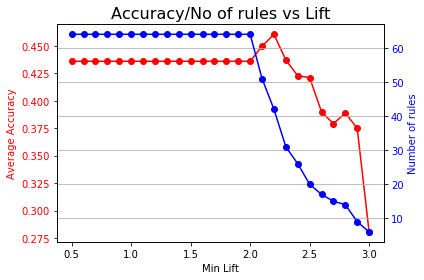

In [56]:
# Plotting accuracy and number of rules for the range of values of lift

fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('Min Lift')
ax1.set_ylabel('Average Accuracy', color='r')
ax1.plot(min_lift, lift_accuracy, 'ro-')
ax1.tick_params(axis='y', labelcolor='r')

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Number of rules', color='b')  # we already handled the x-label with ax1
ax2.plot(min_lift, lift_numbers, 'bo-')
ax2.tick_params(axis='y', labelcolor='b')

plt.title("Accuracy/No of rules vs Lift", fontsize=16)
fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.grid()
plt.show()

#### The number of rules are observed to decrease with increasing lift value whereas the accuracy increases and subsequently decreases as it can't find any rule to measure accuracy for. 

#### An approriate value of lift has to be set to further filter the number of rules and get enough accuracy on the rules

In [31]:
print ("Maximum accuracy achieved:",  round(max(lift_accuracy),2))
print ("Maximum accuracy achieved at lift value:",  round(min_lift[lift_accuracy.index(max(lift_accuracy))],3))
print ("Number of rules when maximum accuracy achieved :", lift_numbers[lift_accuracy.index(max(lift_accuracy))])

Maximum accuracy achieved: 0.46
Maximum accuracy achieved at lift value: 2.2
Number of rules when maximum accuracy achieved : 42


#### The value of lift chosen is 2.2 in order to get enough rules and accuracy

In [32]:
set_min_lift = 2.2

In [33]:
min_lift=min_lift.tolist()
min_lift = [ '%.1f' % elem for elem in min_lift]

In [34]:
print ("Accuracy at Lift Value of {} is: {}".format(set_min_lift,round(lift_accuracy[min_lift.index(str(set_min_lift))],3)))
print ("Number of rules are:", lift_numbers[min_lift.index(str(set_min_lift))])

Accuracy at Lift Value of 2.2 is: 0.461
Number of rules are: 42


#### Below code to validate accuracy with given set of hyper-parametes

In [35]:
rul = apriori(train, min_support=set_min_sup, min_confidence = set_min_conf, min_lift = set_min_lift, min_length=2)
    
rul_res=list(rul)

lhs_rules=[]
rhs_rules=[]

for item in rul_res:

    pair = item[0] 
    items = [x for x in pair]

    lhs_rules.append(item.ordered_statistics[0].items_base)

    rhs_rules.append(item.ordered_statistics[0].items_add)

l_t_final, r_t_final =tuple(lhs_rules), tuple(rhs_rules)

print ("The Accuracy at support: {}, confidence: {} and lift: {} is: {}".format(set_min_sup,set_min_conf,set_min_lift,round(find_accuracy(l_t_final,r_t_final, test),3)))
print ("The Number of rules are: {}".format(len(rul_res)))

The Accuracy at support: 0.004, confidence: 0.48 and lift: 2.2 is: 0.461
The Number of rules are: 42


### Let's compute the accuracy with k-fold cross validation

In [36]:
# Splitting the complete dataset into training and testing below with KFolds

clean_df_np = np.array(clean_df_list)

n_split=5
model_rules = apriori(clean_df_np)
kfold = KFold(n_splits=n_split)
kfold.get_n_splits(clean_df_np)

train_list=[]
test_list = []

for train_idx, test_idx in kfold.split(clean_df_np):
    X_train, X_test = clean_df_np[train_idx], clean_df_np[test_idx]
    
    train_list.append(X_train)
    test_list.append(X_test)

#### For a range of values of confidence, we shall compute the accuracy with K number of folds chosen above

In [37]:
kfold_min_conf = np.arange(0.1, 1.0, 0.01)

# Storing the accuracy and numbers in a 2-D array to calculate the mean for all folds
kfold_accuracy = np.zeros([len(kfold_min_conf),n_split])  
kfold_numbers = np.zeros([len(kfold_min_conf),n_split])
kfold_min_conf_fil = []

for r, conf in enumerate(kfold_min_conf):
    for t in range(len(train_list)):
        kfold_rules = apriori(train_list[t], min_support=set_min_sup, min_confidence = conf, min_lift= set_min_lift, min_length=2)

        kfold_rules_res=list(kfold_rules)

        lhs_rules=[]
        rhs_rules=[]

        for item in kfold_rules_res:

            pair = item[0] 
            items = [x for x in pair]

            lhs_rules.append(item.ordered_statistics[0].items_base)

            rhs_rules.append(item.ordered_statistics[0].items_add)

        l_t, r_t =tuple(lhs_rules), tuple(rhs_rules)

        kfold_accuracy[r][t]=find_accuracy(l_t,r_t, test_list[t])
        kfold_numbers[r][t]=len(kfold_rules_res)

#### Computing the mean value of the kFolds below

In [38]:
kfold_accuracy_mean, kfold_numbers_mean = kfold_accuracy.mean(axis=1), kfold_numbers.mean(axis=1)

### Plotting for accuracy and number of rules against a range of values of confidence (In the case of cross-validation)

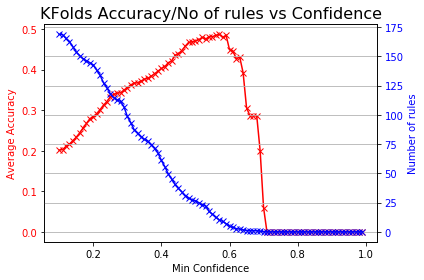

In [62]:
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('Min Confidence')
ax1.set_ylabel('Average Accuracy', color='r')
ax1.plot(kfold_min_conf, kfold_accuracy_mean, 'rx-')
ax1.tick_params(axis='y', labelcolor='r')

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Number of rules', color='b')  # we already handled the x-label with ax1
ax2.plot(kfold_min_conf, kfold_numbers_mean, 'bx-')
ax2.tick_params(axis='y', labelcolor='b')

plt.title("KFolds Accuracy/No of rules vs Confidence", fontsize=16)
fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.grid()
plt.show()

### As observed previously, number of rules is inversely proportional to accuracy

### Let's compare the accuracy achieved with CV and without CV

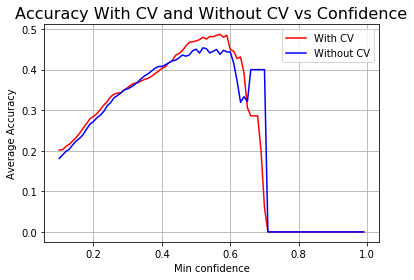

In [61]:
plt.plot(kfold_min_conf, kfold_accuracy_mean, color='r')
plt.plot(kfold_min_conf, conf_accuracy, color='b')
plt.xlabel('Min confidence')
plt.ylabel('Average Accuracy')
plt.legend(['With CV', 'Without CV'])
plt.title("Accuracy With CV and Without CV vs Confidence", fontsize=16)
plt.grid()
plt.show()

### Laying out the rules and their corresponding support, confidence and lift values at the set hyper-parameter values

In [41]:
rule_count=1

for item in rul_res:
    # first index of the inner list
    # Contains base item and add item
    pair = item[0] 
    items = [x for x in pair]
    print("Rule #" +str(rule_count) + " " + str(list(item.ordered_statistics[0].items_base)) + " -> " + str(list(item.ordered_statistics[0].items_add)))

    rule_count+=1
    #second index of the inner list
    print("Support: " + str(item[1]))

    #third index of the list located at 0th
    #of the third index of the inner list

    print("Confidence: " + str(item[2][0][2]))
    print("Lift: " + str(item[2][0][3]))
    print("=====================================")

Rule #1 ['cake', 'turkey'] -> ['eggs']
Support: 0.004
Confidence: 0.525
Lift: 2.8532608695652177
Rule #2 ['cake', 'soup'] -> ['mineral water']
Support: 0.004
Confidence: 0.5833333333333334
Lift: 2.4539262820512824
Rule #3 ['cereals', 'milk'] -> ['mineral water']
Support: 0.004
Confidence: 0.525
Lift: 2.208533653846154
Rule #4 ['ground beef', 'chicken'] -> ['spaghetti']
Support: 0.004761904761904762
Confidence: 0.49019607843137264
Lift: 2.812600450016072
Rule #5 ['soup', 'chocolate'] -> ['mineral water']
Support: 0.007238095238095238
Confidence: 0.6440677966101694
Lift: 2.709419817470665
Rule #6 ['cooking oil', 'eggs'] -> ['mineral water']
Support: 0.006666666666666667
Confidence: 0.5384615384615384
Lift: 2.265162721893491
Rule #7 ['pancakes', 'cooking oil'] -> ['mineral water']
Support: 0.004571428571428572
Confidence: 0.5853658536585367
Lift: 2.4624765478424018
Rule #8 ['ground beef', 'eggs'] -> ['mineral water']
Support: 0.010857142857142857
Confidence: 0.5327102803738317
Lift: 2.240

In [42]:
print ("The Accuracy at support: {}, confidence: {} and lift: {} is: {}".format(set_min_sup,set_min_conf,set_min_lift,round(find_accuracy(l_t_final,r_t_final, test),3)))
print ("The Number of rules are: {}".format(len(rul_res)))

The Accuracy at support: 0.004, confidence: 0.48 and lift: 2.2 is: 0.461
The Number of rules are: 42


**References:**

https://stackabuse.com/association-rul_min_lifte-mining-via-apriori-algorithm-in-python/

https://www.kaggle.com/datatheque/association-rul_min_liftes-mining-market-basket-analysis

https://www.geeksforgeeks.org/implementing-apriori-algorithm-in-python/

https://searchbusinessanalytics.techtarget.com/definition/association-rul_min_liftes-in-data-mining

https://medium.com/data-science-vibes/association-rul_min_lifte-part-1-f37e3cc545a0

https://www.kdnuggets.com/2016/04/association-rul_min_liftes-apriori-algorithm-tutorial.html

https://adataanalyst.com/machine-learning/apriori-algorithm-python-3-0/

https://zaxrosenberg.com/unofficial-apyori-documentation/